# A tutorial on wrangling ocean climate data in python

Jeevith Hegde <br/>
Postdoctoral fellow <br/>
Department of Marine Technology <br/>
NTNU 

## Overview
1. **_Different sources for extracting climate data_**
2. Downloading climate data
3. Working with multi-dimensional grid-based data
4. Plotting grid-based data
5. Extracting data for a given lat, lon values
6. Resources

## Data formats

#### [1. GRIB - GRIdded Binary or General Regularly-distributed Information in Binary form](http://weather.mailasail.com/Franks-Weather/Grib-Files-Explained) 
```diff
+ Smaller file sizes
+ Open for data manipulation when combining multiple files
```

#### [2. Netcdf4 - Network Common Data Format](https://www.unidata.ucar.edu/software/netcdf/)
NetCDF is a data format that support the creation, access, and sharing of array-oriented scientific data. This format is mainly used by the Climate Community. <br/>

```diff
+ Many modules support netcdf format as of 2019 
- Large file sizes depending on number of parameters
```

####  [3. HDF - Hierarchical Data Format](https://www.hdfgroup.org/solutions/hdf5/)
Software library and file format to manage, process, and store your heterogeneous data. <br/>
```diff
+ Light weight data format - used extensively in development of Neural networks
- Relatively low use in the climate analysis communities
```


## Services / interfaces

#### [1. THREDDS - Thematic Real-time Environmental Distributed Data Services](https://www.unidata.ucar.edu/software/thredds/current/tds/)
A web server that provides metadata and data access for scientific datasets, using a variety of remote data access protocols. <br/>

#### [2. OPENDAP - Open-source Project for a Network Data Access Protocol](https://www.opendap.org/)
OPeNDAP provides software which makes local data accessible to remote locations regardless of local storage format. <br/>
```diff
+ User friendly
```

#### [3. WMS - Web map service](https://www.e-education.psu.edu/geog585/node/699)
```diff
- XML tree parsing is expensive and time consuming
```

#### [4. WCS - Web coverage service](https://www.opengeospatial.org/standards/wcs)
```diff
- XML tree parsing is expensive and time consuming
```


## Data sources



| Source        |  Abbreviation         | Available parameters  |
| :-------------: |:-------------| :-----:|
| <img src="https://d15l9woddkztht.cloudfront.net/logos/ecmwf---european-centre-for-medium-range-weather-forecasts-c8d07238-49b3-4a01-84ba-846ca9d60aba.svg" alt="ECMWF" width="200"/> | European Centre for Medium-Range Weather Forecasts (ECMWF)      | Ocean surface and air column data|
| <img src="https://www.hycom.org/images/banners/hycom_acronym.png" alt="HYCOM" width="70"/>    | HYbrid Coordinate Ocean Model (HYCOM)     |  Ocean water column data |
| <img src="https://www.met.no/_/asset/no.met.metno:1552313017/images/met-logo.svg" alt="Meteorologisk institutt" width="200"/>    | Meteorologisk institutt (MET)   |    Ocean water column data + Ocean surface and air column data   |
| <img src="https://www.ecmwf.int/sites/default/files/medialibrary/2018-05/Copernicus-vecto-def-Europes-eyes-on-Earth-690px.jpg" alt="Copernicus climate data" width="150"/>    | Copernicus climate data (ECMWF Re-Analysis - ERA5) |   Ocean surface and air column data    |







<img src="https://d15l9woddkztht.cloudfront.net/logos/ecmwf---european-centre-for-medium-range-weather-forecasts-c8d07238-49b3-4a01-84ba-846ca9d60aba.svg" alt="ECMWF" width="300"/>

* Over 30 different parameters are available 
* Data based on request
* Account is required and downloading data takes some time
* eg., Significant wave height, wind speed, wave period etc








<img src="https://www.hycom.org/images/banners/hycom_acronym.png" alt="drawing" width="130"/>

* Provides underwater climate parameters 
* No login required
* Interfaces - THREDDS, WCS, WMS
* Data in netcdf or netcdf4 formats 
* eg., sea surface height, water temperature, salinity, current




<img src="https://www.met.no/_/asset/no.met.metno:1552313017/images/met-logo.svg" alt="Meteorologisk institutt" width="350"/>

* Many different application programming interface ([APIs](https://api.met.no/)) and services
* Also uses ECMWF and Copernicus datasets
* For ocean use _WeatherAPI_ /_Oceanforecast_
* Some services offer climate data from 1900!  ([eklima](http://sharki.oslo.dnmi.no/portal/page?_pageid=73,39035,73_39049&_dad=portal&_schema=PORTAL))



<img src="https://www.ecmwf.int/sites/default/files/medialibrary/2018-05/Copernicus-vecto-def-Europes-eyes-on-Earth-690px.jpg" alt="Copernicus climate data" width="300"/> 


**Update in 2019 <br> ECMWF (ERA Interim 1979 - present) = Copernicus Climate data (ER5)**
* Free API key to download data
* Similar parameters names as ECMWF
* Equiped with a good guide upon login
* Ability to query specific periods, grid size etc



## Overview
1. Different sources for extracting climate data
2. **_Downloading climate data_**
3. Working with multi-dimensional grid-based data
4. Plotting grid-based data
5. Extracting data for a given lat, lon values

## 2. Downloading climate data

Lets starts simple with Meteorologisk institutt (MET) data<br>


In [1]:
# Oceandata from api.met.no for depth
# https://api.met.no/weatherapi/documentation
import requests
import xmltodict

lat = round(64.1686788, 2)
lon = round(7.0519402, 1)

# Query the /weatherapi/oceanforecast/ api with latitude and longitude values
url = "https://api.met.no/weatherapi/oceanforecast/0.9/?lat="+str(lat)+"&lon="+str(lon)
print (url)

https://api.met.no/weatherapi/oceanforecast/0.9/?lat=64.17&lon=7.1


In [2]:
r = requests.get(url)  # using requests to get webcontent
doc = xmltodict.parse(r.content)
x = doc['mox:Forecasts']['mox:forecast']
depth = x[0]['metno:OceanForecast']['mox:seaBottomTopography']['#text']  
x
depth

'309.0'

## Overview
1. Different sources for extracting climate data
2. Downloading climate data
3. **_Working with multi-dimensional grid-based data_**
4. Plotting grid-based data
5. Extracting data for a given lat, lon values

## 3. Working with multi-dimensional grid-based data

####  Reading data with xarray library 

In [3]:
import xarray as xr

# Using xarray to open the .nc4 file
with xr.open_dataset('{}'.format("data/ts3z.nc4")) as ds:  # opens the file, reads the file to memory and closes the .nc4 file
    data = ds

# Finding the dimensions op the data
data.dims

Frozen(SortedKeysDict({'time': 11, 'depth': 1, 'lat': 2001, 'lon': 4500}))

####  Reading data with netCDF4 library

In [4]:
# Example using netCDF4 module in python
from netCDF4 import Dataset

# Using netCDF4 to open the .nc4 file
dataset = Dataset("data/ts3z.nc4",mode='r')  # mode = r is (read)

# Finding the dimensions op the data
dataset.dimensions

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 11),
             ('depth',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 1),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 2001),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 4500)])

In [5]:
dataset.close()  # Netcdf files need to be closed

#### Querying variable name and units in xarray

In [6]:
data.variables['salinity']

<xarray.Variable (time: 11, depth: 1, lat: 2001, lon: 4500)>
[99049500 values with dtype=float32]
Attributes:
    long_name:      Salinity
    standard_name:  sea_water_salinity
    units:          psu
    NAVO_code:      16

In [7]:
data.variables['salinity'].attrs['long_name']


'Salinity'

In [8]:
data.variables['salinity'].attrs['units']

'psu'

#### Selecting variable slices in xarray

In [9]:
sal = data['salinity'].isel(time=0)
sal

<xarray.DataArray 'salinity' (depth: 1, lat: 2001, lon: 4500)>
[9004500 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2016-05-15
  * depth    (depth) float64 10.0
  * lat      (lat) float64 -80.0 -79.92 -79.84 -79.76 ... 79.76 79.84 79.92 80.0
  * lon      (lon) float64 0.0 0.07996 0.16 0.24 ... 359.7 359.8 359.8 359.9
Attributes:
    long_name:      Salinity
    standard_name:  sea_water_salinity
    units:          psu
    NAVO_code:      16

#### Extracting all values of individual variables from xarray dataset

In [11]:
lon = data['lon'][:][:]
lat = data['lat'][:][:]
tim = data['time'][:][:]
salinity = data['salinity'][:][:]
water_temp = data['water_temp'][:][:]

## Overview
1. Different sources for extracting climate data
2. Downloading climate data
3. Working with multi-dimensional grid-based data
4. **_Plotting grid-based data_**
5. Extracting data for a given lat, lon values

## 4. Plotting grid-based data


**Grid based data can**
```diff
+ be large and hard to contemplate
+ have different projections
+ have different lattitude and longitude conventions 
+ require working with vector fields
```


**Plotting the data helps in**
```diff
+ understanding the data and its trends visually
+ checking if the correct location is choosen
```


## Plotting tools
[1. **Panoply**](https://www.giss.nasa.gov/tools/panoply/) is a light-weight java based visualizer for grid-based data

```diff
+ Excellent tool to get an overview of the data
+ GUI interface and supports GRIB, NETCDF, HDF formats
- Cannot manipulate data to build custom maps / plots
```

[2. **Basemap**](https://matplotlib.org/basemap/) is based on the standard python plotting library Matplotlib  

```diff
+ Maps can be customized
+ Very good documentation
- A steep learning curve
- Can have installation issues
```

[3. **Geopandas**](http://geopandas.org/) a python library for plotting grid-based data

```diff
+ Maps / plots can be customized
+ Very easy to learn and implement
- Not as customizable as basemap
```

### Plotting the _salinity_ varaible from example data

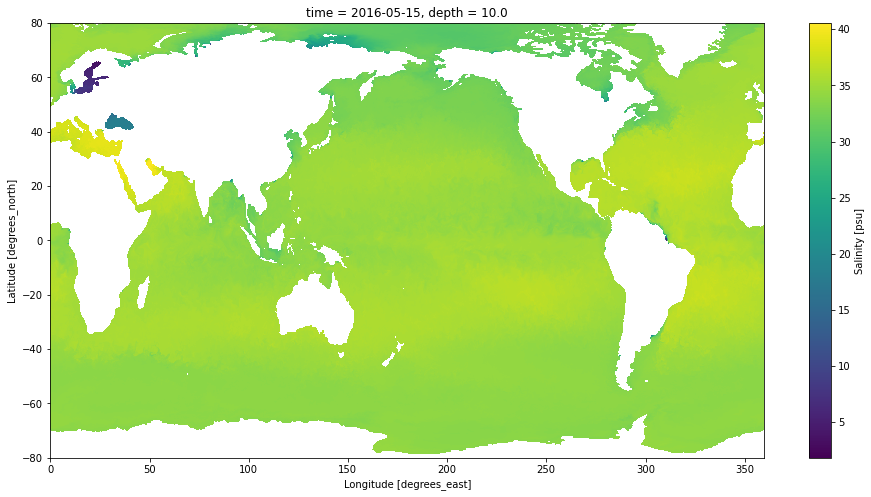

In [12]:
import matplotlib.pyplot as plt
# shows the plot in the jupyter notebook
%matplotlib inline  

sal.plot(figsize =(16,8))

### Plotting the _water temperature_ varaible from example data


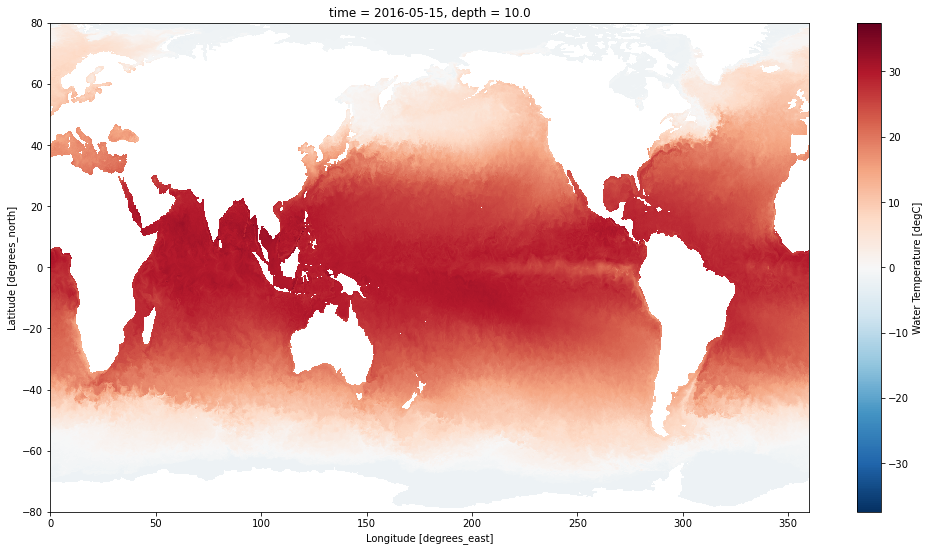

In [13]:
data['water_temp'].isel(time=0).plot(figsize =(17,9))

### Helper functions to ease data manipulation tasks

In [14]:
def time_string(time):
    """
    returns the time variable in the required format
    """
    #return datetime.utcfromtimestamp(time).strftime('%d-%m-%Y at %H:%M:%S')
    return pd.Timestamp(float(time)).strftime('%d-%m-%Y')

In [15]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

### Shifting grids from (0, - 360) to (-180 to 180)

In [17]:
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import pandas as pd

## shift data so lons go from -180 to 180 instead of 0 to 360.
water_temp, lon = shiftgrid(180., water_temp, lon.values, start=False)

### Example plotting function to plot and save the figure using basemap library

In [18]:
def plotting(variable, name, title, index):
    plt.figure(figsize=(15,7))
    #map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
    map = Basemap(projection='cyl',llcrnrlat=52,urcrnrlat=73, llcrnrlon=0,urcrnrlon=42, resolution='c') # for Norway projection
    cs = plt.contourf(lon, lat, np.ma.filled((variable[index][0][:][:]), 0), alpha=0.9)
    
    # draw parallels and meridians.
    map.drawcoastlines()
    map.fillcontinents(color='#ffe2ab', alpha=1)
    map.drawcountries(linewidth=0.1)
    map.drawparallels(np.arange(int(-80.125),int(85.625),10), labels=[1,0,0,0], linewidth=0.0)
    map.drawmeridians(np.arange(int(0),int(360),60),labels=[0,0,0,1], linewidth=0.0, rotation=30)
    
    cbar = map.colorbar(cs, aspect=10, fraction=0.15, shrink=12, pad=0.04, extend='both')
    plt.clim(np.nanmin(variable[:][:][:]), np.nanmax(variable[:][:][:]))  # Colorbar values will depend on max and min or array
    cbar.set_label('{} ({})'.format(data.variables[name].attrs['long_name'], data.variables[name].attrs['units']))
    plt.tight_layout()
    plt.title("{} : {}".format("Date", time_string(tim[index])))
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("images/{}.png".format(index), bbox_inches = "tight", dpi=1000)
    plt.show()

### Plotting in basemap

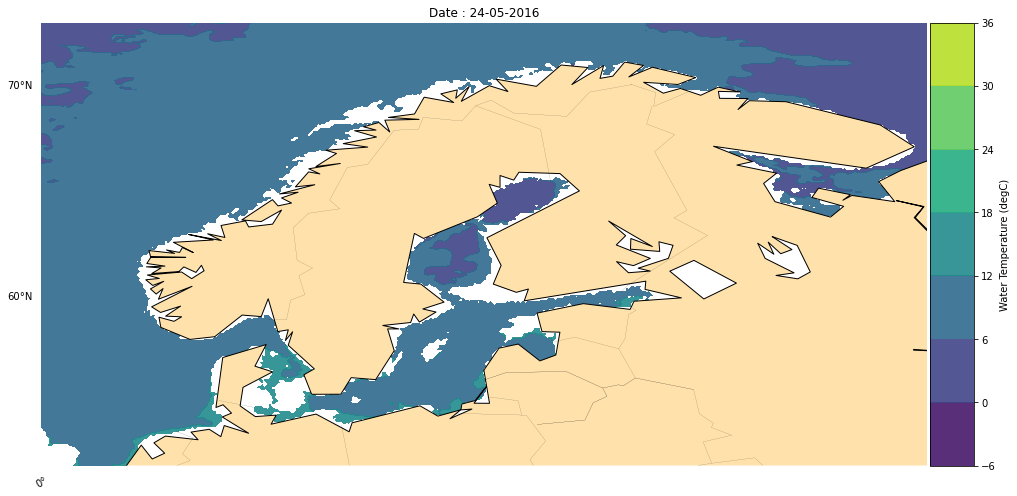

In [19]:
import warnings
warnings.filterwarnings('ignore')  # used just to mute the warnings in this case

plotting(water_temp, 'water_temp', 'water_temp (c)', index=9)

## Overview
1. Different sources for extracting climate data
2. Downloading climate data
3. Working with multi-dimensional grid-based data
4. Plotting grid-based data
5. **_Extracting data for a given lat, lon values_**

### Extracting data for a given (lattitude, longitude)

In [20]:
# For a given location
from datetime import datetime
import numpy as np 
import pandas as pd

# Input choosen lat and lon values
in_lat = float(input("Input Latitude (N) "))
in_lon = float(input("Input Longitude (E) "))

# Using the helper function to find the nearest datapoint / index in the grid for a given (lat, lon)
lat_idx, lon_idx = geo_idx(in_lat, lat), geo_idx(in_lon, lon)

# Initializing lists and iterating through the data
time_, salinity_, water_temp_= [], [], []
for i in range(0, len(tim[:])):
    time_.append((time_string(tim[i])))  # from helper function time_string
    var = np.ma.filled(float(salinity[i][0][lat_idx][lon_idx]), 0)
    salinity_.append((np.round(var,2)))   
    water_temp_.append(float(water_temp[i][0][lat_idx][lon_idx]))


Input Latitude (N) 64.5
Input Longitude (E) 10


### Saving the extracted data as a dataframe using pandas library

In [21]:
# Export as csv using pandas module
# Making a dictonary
data_df = {"Latitude": in_lat  , "Longitude": in_lon, "Time": time_, "Salinity (psu)": salinity_,'Water temperature (degc)': water_temp_}
# Passing dictonary as input in pandas
df = pd.DataFrame(data_df)
# saving the resulting dataframe to local storage
df.to_csv("{}.csv".format('Climate_data'),index=False)

# the dataframe
df

,Latitude,Longitude,Time,Salinity (psu),Water temperature (degc)
0,64.5,10.0,15-05-2016,32.33,7.513000
1,64.5,10.0,16-05-2016,32.32,7.617000
2,64.5,10.0,17-05-2016,32.33,7.528999
3,64.5,10.0,18-05-2016,32.37,7.648000
4,64.5,10.0,19-05-2016,32.41,7.582000
5,64.5,10.0,20-05-2016,32.38,7.874999
6,64.5,10.0,21-05-2016,32.37,7.962000
7,64.5,10.0,22-05-2016,32.40,8.280000
8,64.5,10.0,23-05-2016,32.36,8.153999
9,64.5,10.0,24-05-2016,32.32,8.421000


## Overview
1. Different sources for extracting climate data
2. Downloading climate data
3. Working with multi-dimensional grid-based data
4. Plotting grid-based data
5. Extracting data for a given lat, lon values


## Resources

1. [Netcdf4-python](https://github.com/Unidata/netcdf4-python)
[![IMAGE ALT TEXT HERE](http://img.youtube.com/vi/XqoetylQAIY/0.jpg)](https://www.youtube.com/watch?v=XqoetylQAIY)

2. [Xarray quick start guide](https://youtu.be/_9j7Y1-lk-o)
[![Xarray basics](http://img.youtube.com/vi/_9j7Y1-lk-o/0.jpg)](https://www.youtube.com/watch?v=_9j7Y1-lk-o&feature=youtu.be)

